Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1.Loading Dataset

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [4]:
df = pd.read_csv('Churn_Modelling.csv')
df.shape

(10000, 14)

2.Performing Visualizations

Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


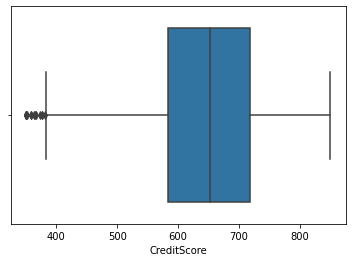

In [5]:
sns.boxplot(df['CreditScore'])

Bi-variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


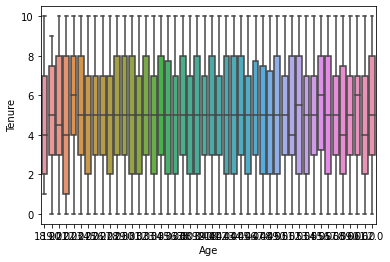

In [7]:
sns.boxplot(df['Age'],df['Tenure'])

Multi-variate Analysis

<AxesSubplot: >

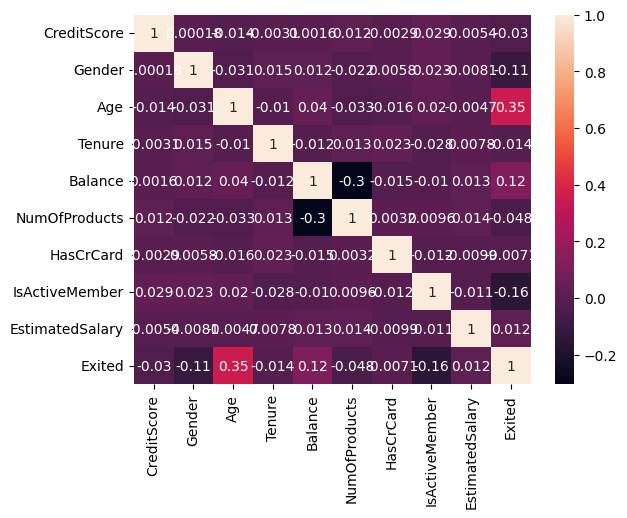

In [ ]:
sns.heatmap(df.corr(), annot=True)

3.Perform Descriptive Statistics

In [ ]:
df.drop(columns=['Gender', 'HasCrCard', 'IsActiveMember', 'Exited']).describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


4.Handling Missing Values

In [ ]:
df.duplicated().sum()

In [ ]:
df.isna().sum()

In [ ]:
df.nunique()

In [ ]:
df.info()

5.Find Outliers and Replace Outliers

In [ ]:
qnt = df.drop(columns=['Gender', 'Tenure', 'HasCrCard', 'IsActiveMember', 'NumOfProducts', 'Exited']).quantile(q=[0.25, 0.75])
qnt

,CreditScore,Age,Balance,EstimatedSalary
0.25,584.0,32.0,0.00,51002.1100
0.75,718.0,44.0,127644.24,149388.2475


In [ ]:
Q1 = qnt.iloc[0]
Q3 = qnt.iloc[1]
iqr = Q3 - Q1
iqr

CreditScore           134.0000
Age                    12.0000
Balance            127644.2400
EstimatedSalary     98386.1375
dtype: float64

In [ ]:
upper = qnt.iloc[1] + 1.5*iqr
upper

CreditScore           919.00000
Age                    62.00000
Balance            319110.60000
EstimatedSalary    296967.45375
dtype: float64

In [ ]:
lower = qnt.iloc[0] - 1.5*iqr
lower

CreditScore           383.00000
Age                    14.00000
Balance           -191466.36000
EstimatedSalary    -96577.09625
dtype: float64

In [6]:
df['CreditScore'] = np.where(df['CreditScore']>756, 650.5288, df['CreditScore'])
df['Age'] = np.where(df['Age']>62, 38.9218, df['Age'])

6.Categorical Columns and Perform Encoding

In [ ]:
df['Gender'].replace({'Male': 1, 'Female': 0}, inplace=True)
df.head(5)

Dropping Unwanted Columns

In [ ]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Geography'])
df.head()

7.Split Data into Dependent and Independent Variables

In [ ]:
x = df.iloc[:, :-1]
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619.0000,0,42.0,2,0.00,1,1,1,101348.88
1,608.0000,0,41.0,1,83807.86,1,0,1,112542.58
2,502.0000,0,42.0,8,159660.80,3,1,0,113931.57
3,699.0000,0,39.0,1,0.00,2,0,0,93826.63
4,650.5288,0,43.0,2,125510.82,1,1,1,79084.10


In [ ]:
y = df.iloc[:, -1]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

 8.Scale the independent variables

In [ ]:
pip install sklearn

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform()

In [ ]:
print(x)

9.Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
x_train.shape

(8000, 9)

In [ ]:
x_test.shape

(2000, 9)

In [ ]:
x_train

array([[ 0.51725045, -1.09598752, -0.44325625, ...,  0.64609167,
        -1.03067011,  1.10838187],
       [-2.73324343,  0.91241915,  0.48205148, ...,  0.64609167,
         0.97024255, -0.74759209],
       [-1.27052118, -1.09598752, -1.02157358, ...,  0.64609167,
        -1.03067011,  1.48746417],
       ...,
       [ 1.47885489,  0.91241915, -0.32759278, ...,  0.64609167,
        -1.03067011,  1.41441489],
       [-0.52561634, -1.09598752,  0.01939762, ...,  0.64609167,
         0.97024255,  0.84614739],
       [-0.07867343, -1.09598752,  1.17603229, ...,  0.64609167,
        -1.03067011,  0.32630495]])

In [ ]:
x_test

array([[-0.43081026, -1.09598752, -0.32759278, ...,  0.64609167,
         0.97024255,  1.61304597],
       [-1.43304588, -1.09598752,  0.25072455, ...,  0.64609167,
        -1.03067011,  0.49753166],
       [ 1.04545571, -1.09598752,  0.48205148, ...,  0.64609167,
         0.97024255, -0.4235611 ],
       ...,
       [-0.68814103,  0.91241915, -0.21192932, ...,  0.64609167,
        -1.03067011,  0.72065149],
       [ 0.28700714,  0.91241915, -0.44325625, ...,  0.64609167,
         0.97024255, -1.54438254],
       [-0.75585965,  0.91241915, -0.90591012, ...,  0.64609167,
        -1.03067011,  1.61474887]])